Projeto Qualidade de energia 

Allan corço
Carlos Eduardo 
Isaque Almeida
Leonardo Yuji 

# Base de Dados

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

## Sinal Fundamental

In [40]:
# sinal fundamental
N_periodos = 12
freq = 50
Amostras_ciclo = 128
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)

Sen = np.sqrt(2)*np.sin(2*np.pi*freq*t)

In [48]:
#Especificações

#Qtd de disturbios
Dis = 150

#Num de ciclos*Qtd de amostras
NumA = Amostras_ciclo*N_periodos

#Criação de parametros
FlickerP = np.zeros((Dis,3))
HarmonicoP = np.zeros((Dis,21))
NotchP = np.zeros((Dis,3))


Flicker = np.zeros((Dis,NumA))
Harmonico = np.ones((Dis,NumA))
Notch = np.zeros((Dis,NumA))

#Matriz com valores finais
Resposta = np.zeros((Dis*2,NumA))

#Indices dos disturbios

# 150 distorçoes 
# 4 parametros
# 3 Tipos de distorçoes

###########################################################################

#(Flicker)

#Phi
FlickerP[:,0] = np.random.uniform(0,(2*np.pi),size=(1,Dis)) 

#Tensão "natural?"
FlickerP[:,1] = np.random.uniform(0.05,0.1,size=(1,Dis))

#Tensão "natural?"
FlickerP[:,2] = np.random.uniform(8,25,size=(1,Dis))

###########################################################################

#(Harmonico)

#Phi
for i in range(11):
    HarmonicoP[:,i] = np.random.uniform(-np.pi,(np.pi),size=(1,Dis)) 

#Alpha"
for i in range(11,21):
    if(i % 2 == 0): 
        HarmonicoP[:,i] = np.random.uniform(0.015,0.03,size=(1,Dis))
    else:
        HarmonicoP[:,i] = np.random.uniform(0.03,0.06,size=(1,Dis))

###########################################################################

#(Notch)

#Ro 
ro = 0.5

#W
w = 2*np.pi*50

# K 
NotchP[:,2] = np.random.uniform(1,11,size=(1,Dis))

#Alpha"                             
#Mi
for i in range(len(NotchP)):
    aux = 0
    while(aux == 0):
        a = np.random.uniform(0,(np.pi/2)) 
        u = ((36500*2*np.pi)/(20000))/(np.sqrt(2)*460*ro*np.sin(a))  
        NotchP[i,0] = a
        NotchP[i,1] = u        
        if(u < a):
            #if((a + (NotchP[i,2]*np.pi/6)) == 0 and (w*N_periodos*(1/freq)) <= (a + (NotchP[i,2]*np.pi/6) + u)):
            #if( (w*N_periodos*(1/freq)) <= (a + (NotchP[i,2]*np.pi/6) + u)):
            aux = 1  

###########################################################################

## Flicker

<IPython.core.display.Javascript object>


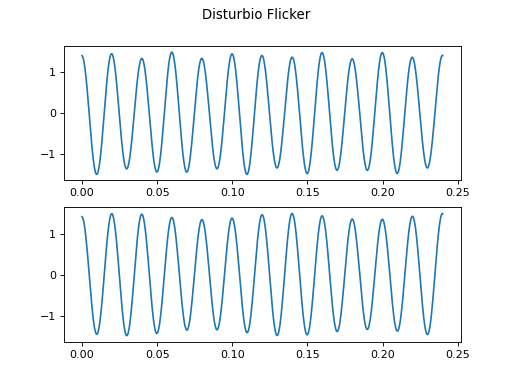

In [61]:
for i in range(len(FlickerP)):
    Flicker[i,:] = np.sqrt(2)*(np.sin((2*np.pi*50*t)+ FlickerP[i,0]))*(1 + (FlickerP[i,1]*np.sin(2*np.pi*t*FlickerP[i,2])))

fig, (ax1, ax2) = plt.subplots(2,dpi = 80)
fig.suptitle('Disturbio Flicker')
ax1.plot(t, Flicker[0,:])
ax2.plot(t, Flicker[5,:])

## Harmônicos

<IPython.core.display.Javascript object>


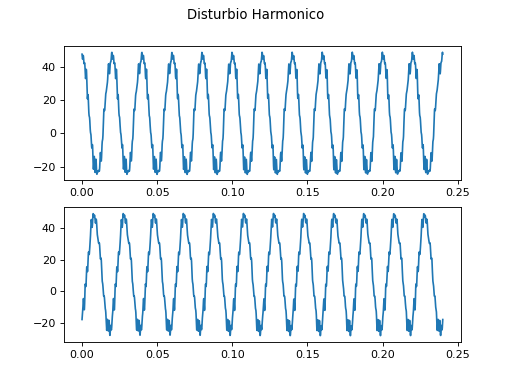

In [60]:
for i in range(len(HarmonicoP)):
    for j in range(1,11):
        if((j % 2) == 0):
            Harmonico[i,:] = (HarmonicoP[i,(j+10)]*np.sin((2*np.pi*(2*j)*50*t)+ HarmonicoP[i,j])) + Harmonico[i,:]
        else:
            Harmonico[i,:] = (HarmonicoP[i,(j+10)]*np.sin((2*np.pi*((2*j)+1)*50*t)+ HarmonicoP[i,j])) + Harmonico[i,:]
    Harmonico[i,:] = np.sqrt(2)*((np.sin((2*np.pi*50*t)+HarmonicoP[i,0])) + Harmonico[i,:])       
    
    
fig, (ax1, ax2) = plt.subplots(2,dpi = 80)
fig.suptitle('Disturbio Harmonico')
ax1.plot(t, Harmonico[35,:])
ax2.plot(t, Harmonico[100,:])  

## Teste1 Notch (Não Funciona direito)

<IPython.core.display.Javascript object>


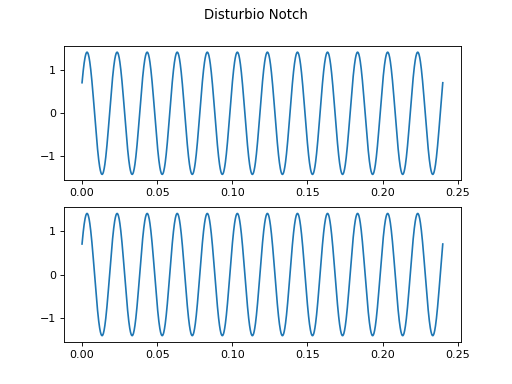

In [51]:
for i in range(len(NotchP)):
    for k in range(1,11):
        if(k % 2 == 0):
            Notch[i,:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))) 
        elif(k == 1 or k == 7):
            Notch[i,:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))+(0.5*ro*np.sin((w*t)+(5*np.pi/6))))       
        elif(k == 3 or k == 9):
            Notch[i,:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))-(0.5*ro*np.cos((w*t)))) 
        elif(k == 5 or k == 11):
            Notch[i,:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))-(ro*np.sin((w*t)+(5*np.pi/6)))) 


fig, (ax1, ax2) = plt.subplots(2,dpi = 80)
fig.suptitle('Disturbio Notch')
ax1.plot(t, Notch[0,:])
ax2.plot(t, Notch[1,:]) 

## Teste2 Notch (Não Funciona direito[tambem])

<IPython.core.display.Javascript object>


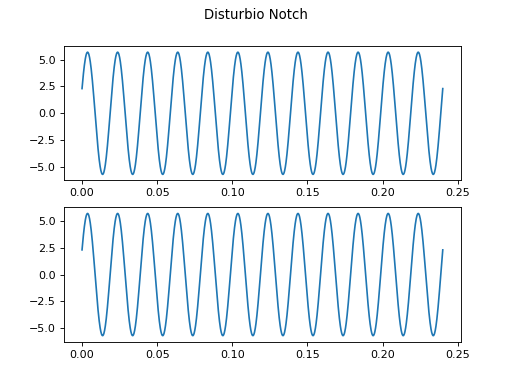

In [52]:
N2 = np.zeros((Amostras_ciclo*N_periodos))
N3 = np.zeros((Amostras_ciclo*N_periodos))
N4 = np.zeros((Amostras_ciclo*N_periodos))
N5 = np.zeros((Amostras_ciclo*N_periodos))

for i in range(len(NotchP)):
    for k in range(1,11):
        if(k % 2 == 0):
            N2[:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))) 
        elif(k == 1 or k == 7):
            N3[:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))+(0.5*ro*np.sin((w*t)+(5*np.pi/6))))       
        elif(k == 3 or k == 9):
            N4[:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))-(0.5*ro*np.cos((w*t)))) 
        elif(k == 5 or k == 11):
            N5[:] = np.sqrt(2)*(np.sin((w*t)+(np.pi/6))-(ro*np.sin((w*t)+(5*np.pi/6)))) 
    Notch[i,:] = N2 + N3 + N4 + N5

fig, (ax1, ax2) = plt.subplots(2,dpi = 80)
fig.suptitle('Disturbio Notch')
ax1.plot(t, Notch[0,:])
ax2.plot(t, Notch[1,:]) 

### Salvar Valores

In [53]:
Resposta[0:Dis,:] = Flicker

Resposta[Dis:(Dis*2),:] = Harmonico

#Resposta[(Dis*2):(Dis*3),:] = Notch


save = pd.DataFrame(Resposta)
save.to_csv('Disturbios.csv')

<IPython.core.display.Javascript object>


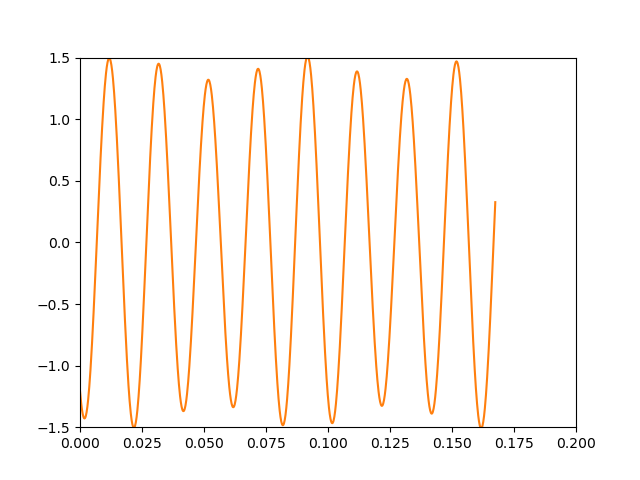

In [63]:
# Create figure for plotting

x = t
y = Flicker[1,:]
fig, ax = plt.subplots()
ax.set_xlim(0,0.2)
ax.set_ylim(-1.5,1.5)

line, = ax.plot(0,0)
l, = ax.plot([],[])

def animation_frame(i):
    #x_data.append(i*10)
    #y_data.append(i)
    
    #line.set_xdata(x_data)
    #line.set_ydata(y_data)
    l.set_data(x[:i], y[:i])
    return line,

animation = FuncAnimation(fig,func=animation_frame,frames =len(t),interval=10)
plt.show()